In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from imageio import imread
from skimage.transform import resize
import math
from math import pi
import scipy.stats
from selenium import webdriver
import warnings

import matplotlib as mpl
from matplotlib import colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm


from mplsoccer import Pitch, add_image, VerticalPitch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from highlight_text import fig_text
import matplotlib.patheffects as path_effects

In [3]:
team = 'leeds'
year = '2122'
dfA = []
dfB = []
dfC = []

for i in range(1,38):
    try:
        df = pd.read_csv(f'/work/assets/whoscored/barcelona/match/{year}/eventsData/new/{year}#{i}.csv')
        dfA.append(df)
    except:
        print(i)
    try:
        df = pd.read_csv(f'/work/assets/whoscored/leeds/match/{year}/eventsData/new/{year}#{i}.csv')
        dfB.append(df)
    except:
        print(i)
    try:
        df = pd.read_csv(f'/work/assets/whoscored/bayern/match/{year}/eventsData/new/{year}#{i}.csv')
        dfC.append(df)
    except:
        print(i)

35
36
37


In [4]:
df = pd.concat([*dfA,*dfB,*dfC])
# df = df[df['teamId']==19]
df = df[df['shotsTotal']==True]
df['x'] = df['x'] * 1.2
df['y'] = df['y'] * .8

In [5]:
smooch = "https://github.com/googlefonts/smooch/blob/master/fonts/ttf/Smooch-Regular.ttf?raw=true"
spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
spaceMono_dance = "https://github.com/googlefonts/moondance/tree/master/fonts/ttf?raw=true"
abel_regular = 'https://github.com/google/fonts/blob/main/ofl/abel/Abel-Regular.ttf?raw=true'

from mplsoccer import FontManager
from matplotlib.colors import LinearSegmentedColormap

# smoochFont = FontManager(smooch)
monoIFont = FontManager(spaceMono_italy)
monoBFont = FontManager(spaceMono_bold)
monoDFont = FontManager(spaceMono_dance)
# abel_regular = FontManager(abel_regular)
myFont = monoIFont

In [6]:
figBackColor = "#171733"
axBackColor = "#171733"
textColor = "#fdc526"
titleColor = "#fdc526"

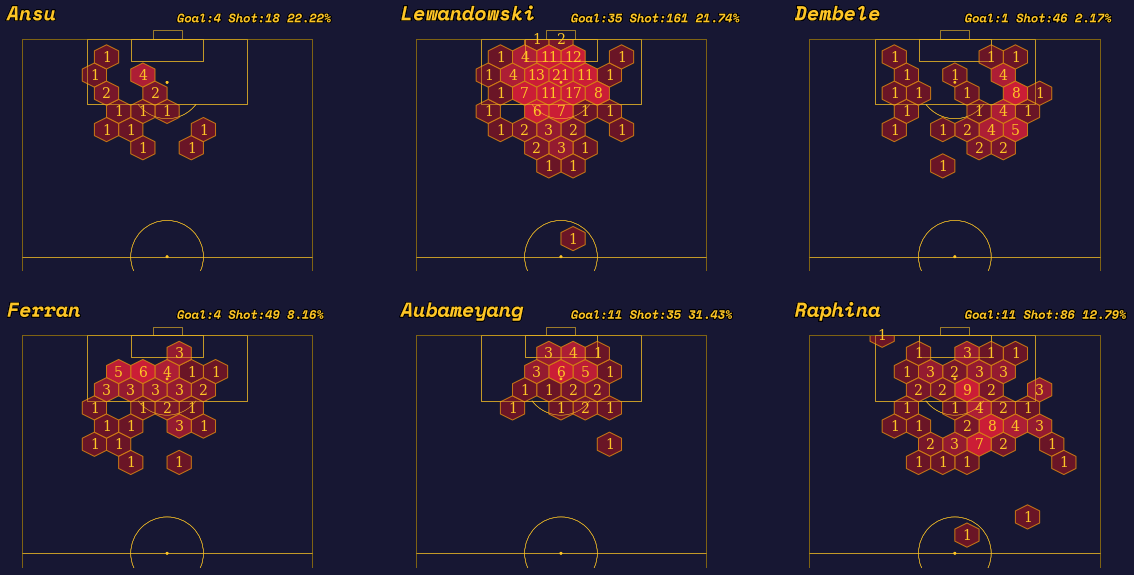

In [9]:
fig, axes = plt.subplots(2,3,figsize=(20,10),facecolor=figBackColor)
axes = axes.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    pitch_color=axBackColor,
    line_color=textColor, 
    figsize=(13.5,8),
    constrained_layout=True,
    tight_layout=False,
    line_zorder=1, 
    linewidth=0.5,
    half=True
)

for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()

colors1 = ['#641220', '#85182a', '#bd1f36', '#e01e37']
n_bins = 50
cmap_name = 'my_list'
cm1 = LinearSegmentedColormap.from_list('my_list', colors1, N=n_bins)

playerIds = {
#     11119:'Messi',
#     22221:'Suarez',
#     50835:'Neymar',
#     9486:'Iniesta',
#     80241:'Griezmann',
#     382234:'Ansu Fati',
#     80767:'Coutinho',
#     299513:'Dembele',
#     368409:'Trincão',
#     73494:'M.Braithwaite',
#     374869:"Carles Pérez",
#     22732:'Rakitic',
#     95953:'Paco',
#     25008:'Vidal',
#     36399:'Paulinho',
#     146780:'Malcom',
#     303268:'Alena',
#     68585:'L.Dejong',
#     115587:'Ocampos',
#     323547:'En-Nesyri',
#     102439:'Vázquez',
#     303729:'Acuna',
#     22546:'Papu',
#     362431:'Felix',
#     127604:'Ángel Correa',
#     254582:'Llorente',
#     132962:'Lemar',
#     115472:'Carrasco',
    382234:"Ansu",
    29400:"Lewandowski",
    299513:'Dembele',
    349760:"Ferran",
    44120:"Aubameyang",
    300447:"Raphina",  
# #     14296:'Benzema',
#     347862:'Rodrygo',
#     337782:'Vinícius',
#     31772:'Kroos',
#     88526:'Casemiro',
#     20874:'Modric'    
}

path_eff = [path_effects.Stroke(linewidth=1, foreground='black'),
            path_effects.Normal()]

for idx,(keyid,name) in enumerate(playerIds.items()):
    bdf = df[df['playerId']==keyid]
    shots = len(bdf)
    goals = len(bdf[bdf['isGoal']==True])
    try:
        per = round((goals / shots) * 100, 2)
    except:
        per = 0
    x = bdf['x']
    y = bdf['y'] 
    h = pitch.hexbin(x,y, ax=axes[idx], cmap=cm1, alpha=0.9, linewidth=1,
                     gridsize=(12,12), linewidths=0, mincnt=1, edgecolors='#D68213',
                     hatch='',vmin=0, vmax=6)
    counts = h.get_array()
    verts = h.get_offsets()

    for i in range(len(counts)):
        pitch.annotate(int(counts[i]), xy=(verts[i][1], verts[i][0]),ha="center",va="center",
                       size=14,ax=axes[idx],zorder=3,color=titleColor,fontname='serif')

        fig_text(s=f"<{name}>",
             x=axes[idx].get_position().x0,y=axes[idx].get_position().y1,
             color="#ffffff",
             highlight_colors=[textColor],
             highlight_weights=["bold"],
             highlight_styles=["italic"],
             fontsize=20, path_effects=path_eff,
             fontproperties=monoBFont.prop,fig=fig)
    
        fig_text(s=f'<Goal:{goals} Shot:{shots} {per}%>',
             x=axes[idx].get_position().x0+.118,y=axes[idx].get_position().y1,
             color="#ffffff",
             highlight_colors=[textColor],
             highlight_weights=["bold"],
             highlight_styles=["italic"],
             fontsize=12, path_effects=path_eff,
             fontproperties=monoBFont.prop,fig=fig)



# plt.text(222,220,f"{targetTeam.title()}'s Player Shot Locations in La Liga {targetYear}", fontsize=28, alpha=.9, color=titleColor,fontname='Roboto Condensed')
# plt.text(290,50,"Data via Whoscored / Inspired by @jonollington Created by @Bucciratimes", color=textColor, fontsize=14, alpha=0.5)


for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()

plt.savefig(f'/work/output/report/teamB_loc.png', bbox_inches='tight', dpi=250, facecolor=figBackColor)

In [11]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['DejaVu Serif', 'STIXSizeThreeSym', 'Noto Sans', 'Noto Sans', 'DejaVu Sans', 'Roboto Condensed', 'STIXNonUnicode', 'Noto Sans', 'Noto Sans', 'STIXNonUnicode', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans Mono', 'cmb10', 'Noto Sans', 'STIXSizeFourSym', 'cmsy10', 'Noto Sans', 'Noto Sans', 'DejaVu Sans', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'STIXSizeOneSym', 'Noto Sans', 'Noto Sans', 'STIXGeneral', 'cmmi10', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'DejaVu Serif', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'STIXSizeTwoSym', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'STIXSizeOneSym', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'STIXNonUnicode', 'Noto Sans', 'STIXNonUnicode', 'Roboto Condensed', 'DejaVu Sans', 'STIXGeneral', 'Roboto Condensed', 'DejaVu Serif', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'STIXSizeFourSym', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'Noto Sans', 'DejaVu Sans Displ